In [ ]:
import pandas as pd
import os
import sys
import re
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
afcars_folder_path = r'/content/drive/MyDrive/TAG'

In [ ]:
import gspread
from google.colab import auth
from google.auth import credentials
import pandas as pd
from google.colab import files


In [ ]:
data_2021 = pd.read_csv('/content/drive/MyDrive/TAG/FC2021v1.tab', sep ='\t')
population_time = pd.read_csv('/content/drive/MyDrive/TAG/child_pop_by_state_by_year.csv')
population_time = population_time.rename({'Unnamed: 0': 'State'}, axis=1)  

In [ ]:
ror_data = pd.read_csv('/content/drive/MyDrive/TAG/Housing_and_Gen_RoR - Sheet1.csv')
ror_data.head(5)

,Unnamed: 0,state_name,housing_removals_state_2021,Total Children Under 18,ror_housing_state_2021,state_rank_hremovals_2021,all_removals_state_2021,ror_state_2021,state_rank_all_removals_2021
0,0,West Virginia,75,359031,0.208896,1,3728,10.383504,1
1,1,Alaska,0,179356,NaN,43,1000,5.575503,2
2,2,Montana,0,235070,NaN,43,1303,5.543030,3
3,3,Wyoming,0,132424,NaN,43,652,4.923579,4
4,4,North Dakota,14,185701,0.075390,3,734,3.952590,5


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
ror_data.fillna(0)

,Unnamed: 0,state_name,housing_removals_state_2021,Total Children Under 18,ror_housing_state_2021,state_rank_hremovals_2021,all_removals_state_2021,ror_state_2021,state_rank_all_removals_2021
0,0,West Virginia,75,359031,0.208896,1,3728,10.383504,1
1,1,Alaska,0,179356,0.000000,43,1000,5.575503,2
2,2,Montana,0,235070,0.000000,43,1303,5.543030,3
3,3,Wyoming,0,132424,0.000000,43,652,4.923579,4
4,4,North Dakota,14,185701,0.075390,3,734,3.952590,5
5,5,Kentucky,39,1015912,0.038389,9,3956,3.894038,6
6,6,Missouri,66,1384557,0.047669,6,5327,3.847440,7
7,7,Arizona,31,1613988,0.019207,13,6134,3.800524,8
8,8,Vermont,0,116976,0.000000,43,438,3.744358,9
9,9,South Dakota,1,220429,0.004537,34,817,3.706409,10


In [ ]:
ror_data.drop(ror_data[ror_data['state_name'] == 'Puerto Rico'].index, inplace = True)
ror_data

,Unnamed: 0,state_name,housing_removals_state_2021,Total Children Under 18,ror_housing_state_2021,state_rank_hremovals_2021,all_removals_state_2021,ror_state_2021,state_rank_all_removals_2021
0,0,West Virginia,75,359031,0.208896,1,3728,10.383504,1
1,1,Alaska,0,179356,NaN,43,1000,5.575503,2
2,2,Montana,0,235070,NaN,43,1303,5.543030,3
3,3,Wyoming,0,132424,NaN,43,652,4.923579,4
4,4,North Dakota,14,185701,0.075390,3,734,3.952590,5
5,5,Kentucky,39,1015912,0.038389,9,3956,3.894038,6
6,6,Missouri,66,1384557,0.047669,6,5327,3.847440,7
7,7,Arizona,31,1613988,0.019207,13,6134,3.800524,8
8,8,Vermont,0,116976,NaN,43,438,3.744358,9
9,9,South Dakota,1,220429,0.004537,34,817,3.706409,10


In [ ]:
# Calculate the medians of the two columns
housing_median = ror_data['ror_housing_state_2021'].median()
state_median = ror_data['ror_state_2021'].median()

# Define the four categories based on the medians
high_high = ror_data[(ror_data['ror_housing_state_2021'] > housing_median) & (ror_data['ror_state_2021'] > state_median)]
high_low = ror_data[(ror_data['ror_housing_state_2021'] > housing_median) & (ror_data['ror_state_2021'] <= state_median)]
low_high = ror_data[(ror_data['ror_housing_state_2021'] <= housing_median) & (ror_data['ror_state_2021'] > state_median)]
low_low = ror_data[(ror_data['ror_housing_state_2021'] <= housing_median) & (ror_data['ror_state_2021'] <= state_median)]

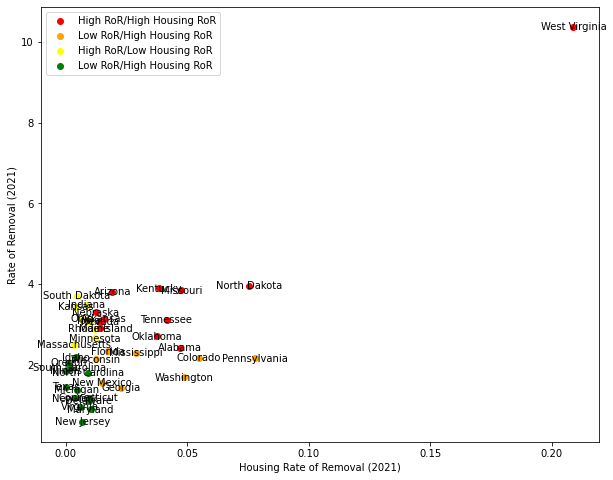

In [ ]:
# Define the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the four categories as scatter plots
ax.scatter(high_high['ror_housing_state_2021'], high_high['ror_state_2021'], color='red', label='High RoR/High Housing RoR')
ax.scatter(high_low['ror_housing_state_2021'], high_low['ror_state_2021'], color='orange', label='Low RoR/High Housing RoR')
ax.scatter(low_high['ror_housing_state_2021'], low_high['ror_state_2021'], color='yellow', label='High RoR/Low Housing RoR')
ax.scatter(low_low['ror_housing_state_2021'], low_low['ror_state_2021'], color='green', label='Low RoR/High Housing RoR')

# Add labels to the data points
for i, row in ror_data.iterrows():
    ax.text(row['ror_housing_state_2021'], row['ror_state_2021'], row['state_name'], ha='center', va='center')

# Set the x and y labels
ax.set_xlabel('Housing Rate of Removal (2021)')
ax.set_ylabel('Rate of Removal (2021)')

# # Set the title
# ax.set_title('Rate of Removal and Housing Rate of Removal')

# Set the legend
ax.legend()

# Show the plot
plt.show()


In [ ]:
#try again without WV so we can get a decent plot
ror_data.drop(ror_data[ror_data['state_name'] == 'West Virginia'].index, inplace = True)

In [ ]:
# Calculate the medians of the two columns
housing_median = ror_data['ror_housing_state_2021'].median()
state_median = ror_data['ror_state_2021'].median()

# Define the four categories based on the medians
high_high = ror_data[(ror_data['ror_housing_state_2021'] > housing_median) & (ror_data['ror_state_2021'] > state_median)]
high_low = ror_data[(ror_data['ror_housing_state_2021'] > housing_median) & (ror_data['ror_state_2021'] <= state_median)]
low_high = ror_data[(ror_data['ror_housing_state_2021'] <= housing_median) & (ror_data['ror_state_2021'] > state_median)]
low_low = ror_data[(ror_data['ror_housing_state_2021'] <= housing_median) & (ror_data['ror_state_2021'] <= state_median)]

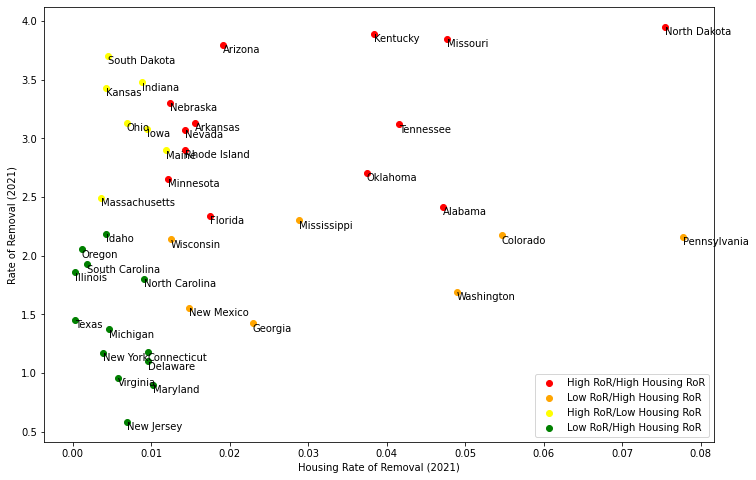

In [ ]:
# Define the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the four categories as scatter plots
ax.scatter(high_high['ror_housing_state_2021'], high_high['ror_state_2021'], color='red', label='High RoR/High Housing RoR')
ax.scatter(high_low['ror_housing_state_2021'], high_low['ror_state_2021'], color='orange', label='Low RoR/High Housing RoR')
ax.scatter(low_high['ror_housing_state_2021'], low_high['ror_state_2021'], color='yellow', label='High RoR/Low Housing RoR')
ax.scatter(low_low['ror_housing_state_2021'], low_low['ror_state_2021'], color='green', label='Low RoR/High Housing RoR')

# Add labels to the data points
for i, row in ror_data.iterrows():
    ax.text(row['ror_housing_state_2021'], row['ror_state_2021'], row['state_name'], ha='left', va='top')

# Set the x and y labels
ax.set_xlabel('Housing Rate of Removal (2021)')
ax.set_ylabel('Rate of Removal (2021)')

# # Set the title
# ax.set_title('Rate of Removal and Housing Rate of Removal')

# Set the legend
ax.legend()

# Show the plot
plt.show()

In [ ]:
#Now I need to get the number of kids in care for each state
data_2021 = pd.read_csv('/content/drive/MyDrive/TAG/FC2021v1.tab', sep ='\t')


<ipython-input-3-90b130cdf74e>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2021 = pd.read_csv('/content/drive/MyDrive/TAG/FC2021v1.tab', sep ='\t')


In [ ]:
data_2021.head(5)

,FY,Version,STATE,St,REPDATYR,REPDATMO,FIPSCode,RecNumbr,SEX,AMIAKN,ASIAN,BLKAFRAM,HAWAIIPI,WHITE,UNTODETM,HISORGIN,CLINDIS,MR,VISHEAR,PHYDIS,EmotDist,OTHERMED,EVERADPT,AGEADOPT,TOTALREM,NUMPLEP,MANREM,PHYABUSE,SEXABUSE,NEGLECT,AAPARENT,DAPARENT,AACHILD,DACHILD,CHILDIS,CHBEHPRB,PRTSDIED,PRTSJAIL,NOCOPE,ABANDMNT,RELINQSH,HOUSING,CURPLSET,PLACEOUT,CASEGOAL,CTKFAMST,CTK1YR,CTK2YR,FOSFAMST,FCCTK1YR,FCCTK2YR,RF1AMAKN,RF1ASIAN,RF1BLKAA,RF1NHOPI,RF1WHITE,RF1UTOD,HOFCCTK1,RF2AMAKN,RF2ASIAN,RF2BLKAA,RF2NHOPI,RF2WHITE,RF2UTOD,HOFCCTK2,DISREASN,IVEFC,IVEAA,IVAAFDC,IVDCHSUP,XIXMEDCD,SSIOTHER,NOA,FCMntPay,DOB,PedRevDt,Rem1Dt,RemTrnDt,DLstFCDt,LatRemDt,CurSetDt,DoDFCDt,DoDTrnDt,TPRMomDt,TPRDadDt,TPRDate,LatRemLOS,SettingLOS,PreviousLOS,LifeLOS,AgeAtStart,AgeAtLatRem,AgeAtEnd,InAtStart,InAtEnd,Entered,Exited,Served,IsWaiting,IsTPR,AgedOut,RaceEthn,Race,RU13,StFCID,PeriodStart,PeriodEnd
0,2021,1,1,AL,2022,3,8.0,000002184641,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,2.0,1,1.0,1982.0,1968.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2007-11-15,NaN,2021-10-01,2021-10-03,NaN,2021-10-01,2021-11-03,2021-12-17,2021-12-17,NaN,NaN,NaN,8.0,NaN,NaN,8.0,12,13,13,0,1,1,0,1,0,0,0,1,1,4.0,AL000002184641,2020-10-01,2021-09-30
1,2021,1,1,AL,2022,3,8.0,000009261202,2.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,4.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,2.0,5,3.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2002-12-15,NaN,2012-01-22,2021-07-16,2013-07-29,2021-07-04,2022-02-26,2022-02-28,2022-03-06,NaN,NaN,NaN,92.0,NaN,554.0,646.0,17,18,18,0,1,1,0,1,0,0,0,1,1,3.0,AL000009261202,2020-10-01,2021-09-30
2,2021,1,1,AL,2022,3,8.0,000040342133,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,2.0,3,3.0,1988.0,NaN,3.0,1964.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99,0.0,0.0,0.0,0.0,0.0,0.0,1.0,556.0,2011-12-15,2021-07-16,2021-04-30,2021-10-20,NaN,2021-04-30,2022-03-18,NaN,NaN,NaN,NaN,NaN,160.0,NaN,NaN,160.0,8,9,9,0,1,1,0,1,1,0,0,1,1,2.0,AL000040342133,2020-10-01,2021-09-30
3,2021,1,1,AL,2022,3,8.0,000041185533,2.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3,2.0,1,3.0,1989.0,NaN,1.0,1984.0,1983.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,99,0.0,0.0,0.0,0.0,1.0,0.0,0.0,527.0,2021-09-15,2022-03-05,2021-09-19,2021-10-21,NaN,2021-09-19,2021-09-19,NaN,NaN,NaN,NaN,NaN,7.0,7.0,NaN,7.0,-1,0,0,0,1,1,0,1,0,0,0,6,6,3.0,AL000041185533,2020-10-01,2021-09-30
4,2021,1,1,AL,2022,3,1073.0,000043725533,2.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2.0,1,3.0,1984.0,NaN,3.0,1964.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99,0.0,0.0,0.0,0.0,0.0,0.0,1.0,243.0,2017-03-15,2021-11-24,2021-09-12,2021-10-05,NaN,2021-09-12,2021-09-20,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,3.0,3,4,4,0,1,1,0,1,0,0,0,2,2,1.0,AL000043725533,2020-10-01,2021-09-30


In [ ]:
grouped_df = data_2021.groupby('St').size().reset_index(name='count')

grouped_df

,St,count
0,AK,4119
1,AL,9082
2,AR,7170
3,AZ,22269
4,CA,72070
5,CO,8147
6,CT,5041
7,DC,810
8,DE,724
9,FL,36161


In [ ]:
grouped_df.to_csv('grouped_df.csv', index=False)
from google.colab import files
files.download('grouped_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#import cenpy
import requests

In [ ]:
my_api = 'ea2958f9c05bffad43f13c7fcbaf152a9026fd0a'

In [ ]:
# Census API endpoint for the 2010 Census
url = f'https://api.census.gov/data/2021/pep/population?get=DENSITY_2021,POP_2021,NAME,STATE&for=region:*&key=ea2958f9c05bffad43f13c7fcbaf152a9026fd0a'

# Send GET request to API endpoint
response = requests.get(url)

# Print the response content (should return a JSON object)
print(response.content)

b'[["DENSITY_2021","POP_2021","NAME","STATE","region"],\n[null,"57159838","Northeast Region",null,"1"],\n[null,"68841444","Midwest Region",null,"2"],\n[null,"127225329","South Region",null,"3"],\n[null,"78667134","West Region",null,"4"]]'


In [ ]:
year = 2021
variables = 'B01001_003E,B01001_004E,B01001_005E,B01001_006E,B01001_027E,B01001_028E,B01001_029E,B01001_030E'

url = f'https://api.census.gov/data/{year}/acs/acs5?get=NAME,B01001_003E,B01001_004E,B01001_005E,B01001_006E,B01001_027E,B01001_028E,B01001_029E,B01001_030E&for=state:*&key=ea2958f9c05bffad43f13c7fcbaf152a9026fd0a'

response = requests.get(url)

data = response.json()

# Create a dictionary to store the population of children under 18 for each state
population_by_state = {}

# Loop through the data and sum up the values for each state
for row in data[1:]:
    state = row[0]
    population = sum(map(int, row[1:]))
    population_by_state[state] = population

population_by_state

{'Alabama': 1122382,
 'Alaska': 182736,
 'Arizona': 1614439,
 'Arkansas': 705790,
 'California': 8992438,
 'Colorado': 1262743,
 'Connecticut': 744500,
 'Delaware': 207655,
 'District of Columbia': 125033,
 'Florida': 4261325,
 'Georgia': 2532210,
 'Hawaii': 311035,
 'Idaho': 458846,
 'Illinois': 2887368,
 'Indiana': 1592105,
 'Iowa': 742194,
 'Kansas': 714171,
 'Kentucky': 1021930,
 'Louisiana': 1101105,
 'Maine': 254608,
 'Maryland': 1373173,
 'Massachusetts': 1389749,
 'Michigan': 2188882,
 'Minnesota': 1323596,
 'Mississippi': 706082,
 'Missouri': 1392404,
 'Montana': 232845,
 'Nebraska': 485941,
 'Nevada': 694062,
 'New Hampshire': 260648,
 'New Jersey': 2040476,
 'New Mexico': 485361,
 'New York': 4217432,
 'North Carolina': 2302352,
 'North Dakota': 184496,
 'Ohio': 2630028,
 'Oklahoma': 961110,
 'Oregon': 873527,
 'Pennsylvania': 2704524,
 'Rhode Island': 212707,
 'South Carolina': 1109848,
 'South Dakota': 218744,
 'Tennessee': 1534290,
 'Texas': 7446224,
 'Utah': 946112,
 'Ve

In [ ]:
variables = 'B01001_003E,B01001_004E,B01001_005E,B01001_006E,B01001_027E,B01001_028E,B01001_029E,B01001_030E'

# Create an empty dictionary to store the population data for all years
population_by_year = {}

# Loop through the years 2010 to 2021
for year in range(2010, 2022):
    url = f'https://api.census.gov/data/{year}/acs/acs5?get=NAME,{variables}&for=state:*&key=ea2958f9c05bffad43f13c7fcbaf152a9026fd0a'
    response = requests.get(url)
    data = response.json()
    
    # Create a dictionary to store the population of children under 18 for each state for the current year
    population_by_state = {}
    
    # Loop through the data and sum up the values for each state for the current year
    for row in data[1:]:
        state = row[0]
        population = sum(map(int, row[1:]))
        population_by_state[state] = population
    
    # Add the population data for the current year to the main dictionary
    population_by_year[year] = population_by_state

population_by_year

{2010: {'Alabama': 1132304,
  'Alaska': 185149,
  'Arizona': 1613505,
  'Arkansas': 706266,
  'California': 9325335,
  'Colorado': 1202538,
  'Connecticut': 827532,
  'Delaware': 205279,
  'District of Columbia': 103101,
  'Florida': 4013102,
  'Georgia': 2462491,
  'Hawaii': 300743,
  'Idaho': 419228,
  'Illinois': 3153476,
  'Indiana': 1607089,
  'Iowa': 724010,
  'Kansas': 715561,
  'Kentucky': 1019934,
  'Louisiana': 1105139,
  'Maine': 281510,
  'Maryland': 1362116,
  'Massachusetts': 1431973,
  'Michigan': 2421000,
  'Minnesota': 1282105,
  'Mississippi': 757403,
  'Missouri': 1427881,
  'Montana': 223069,
  'Nebraska': 453362,
  'Nevada': 657144,
  'New Hampshire': 295985,
  'New Jersey': 2081574,
  'New Mexico': 512508,
  'New York': 4383633,
  'North Carolina': 2238247,
  'North Dakota': 147758,
  'Ohio': 2766312,
  'Oklahoma': 913061,
  'Oregon': 863680,
  'Pennsylvania': 2821684,
  'Rhode Island': 230216,
  'South Carolina': 1069306,
  'South Dakota': 199389,
  'Tennessee': 

In [ ]:
child_pop = pd.DataFrame.from_dict(population_by_year, orient='index').transpose()
child_pop.head(5)

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Alabama,1132304,1132206,1130230,1123368,1117919,1111975,1105190,1102683,1098794,1096377,1092913,1122382
Alaska,185149,186099,186628,187872,188092,188129,187618,186248,186140,184396,183361,182736
Arizona,1613505,1623248,1624655,1621049,1620496,1617293,1619622,1622430,1633787,1635348,1639649,1614439
Arkansas,706266,708216,709389,709969,709562,707826,707239,705723,705948,704273,702837,705790
California,9325335,9303524,9282812,9242224,9212294,9174349,9140289,9114726,9073661,9022152,8956647,8992438


In [ ]:
child_pop.to_csv('child_pop_by_state_by_year.csv', index=True)
files.download('child_pop_by_state_by_year.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
year = 2011
variables = "B01001_003E" # variable for total population of children under 18
url = f'https://api.census.gov/data/{year}/acs/acs5?get=NAME,{variables}&for=state:*&key=ea2958f9c05bffad43f13c7fcbaf152a9026fd0a'

response = requests.get(url)

df_2011 = pd.DataFrame(response.json()[1:], columns=response.json()[0])

df_2011.to_csv('2011_child_pop_by_state.csv', index=False)
files.download('2011_child_pop_by_state.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
year = 2012
variables = "B01001_003E" # variable for total population of children under 18
url = f'https://api.census.gov/data/{year}/acs/acs5?get=NAME,{variables}&for=state:*&key=ea2958f9c05bffad43f13c7fcbaf152a9026fd0a'

response = requests.get(url)

df_2012 = pd.DataFrame(response.json()[1:], columns=response.json()[0])

df_2012.to_csv('2012_child_pop_by_state.csv', index=False)
files.download('2012_child_pop_by_state.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
year = 2013
variables = "B01001_003E" # variable for total population of children under 18
url = f'https://api.census.gov/data/{year}/acs/acs5?get=NAME,{variables}&for=state:*&key=ea2958f9c05bffad43f13c7fcbaf152a9026fd0a'

response = requests.get(url)

df_2013 = pd.DataFrame(response.json()[1:], columns=response.json()[0])

df_2013.to_csv('2013_child_pop_by_state.csv', index=False)
files.download('2013_child_pop_by_state.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
year = 2014
variables = "B01001_003E" # variable for total population of children under 18
url = f'https://api.census.gov/data/{year}/acs/acs5?get=NAME,{variables}&for=state:*&key=ea2958f9c05bffad43f13c7fcbaf152a9026fd0a'

response = requests.get(url)

df_2014 = pd.DataFrame(response.json()[1:], columns=response.json()[0])

df_2014.to_csv('2014_child_pop_by_state.csv', index=False)
files.download('2014_child_pop_by_state.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
year = 2015
variables = "B01001_003E" # variable for total population of children under 18
url = f'https://api.census.gov/data/{year}/acs/acs5?get=NAME,{variables}&for=state:*&key=ea2958f9c05bffad43f13c7fcbaf152a9026fd0a'

response = requests.get(url)

df_2015 = pd.DataFrame(response.json()[1:], columns=response.json()[0])

df_2015.to_csv('2015_child_pop_by_state.csv', index=False)
files.download('2015_child_pop_by_state.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
year = 2016
variables = "B01001_003E" # variable for total population of children under 18
url = f'https://api.census.gov/data/{year}/acs/acs5?get=NAME,{variables}&for=state:*&key=ea2958f9c05bffad43f13c7fcbaf152a9026fd0a'

response = requests.get(url)

df_2016 = pd.DataFrame(response.json()[1:], columns=response.json()[0])

df_2016.to_csv('2016_child_pop_by_state.csv', index=False)
files.download('2016_child_pop_by_state.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
year = 2017
variables = "B01001_003E" # variable for total population of children under 18
url = f'https://api.census.gov/data/{year}/acs/acs5?get=NAME,{variables}&for=state:*&key=ea2958f9c05bffad43f13c7fcbaf152a9026fd0a'

response = requests.get(url)

df_2017 = pd.DataFrame(response.json()[1:], columns=response.json()[0])

df_2017.to_csv('2017_child_pop_by_state.csv', index=False)
files.download('2017_child_pop_by_state.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
year = 2018
variables = "B01001_003E" # variable for total population of children under 18
url = f'https://api.census.gov/data/{year}/acs/acs5?get=NAME,{variables}&for=state:*&key=ea2958f9c05bffad43f13c7fcbaf152a9026fd0a'

response = requests.get(url)

df_2018 = pd.DataFrame(response.json()[1:], columns=response.json()[0])

df_2018.to_csv('2018_child_pop_by_state.csv', index=False)
files.download('2018_child_pop_by_state.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
year = 2019
variables = "B01001_003E" # variable for total population of children under 18
url = f'https://api.census.gov/data/{year}/acs/acs5?get=NAME,{variables}&for=state:*&key=ea2958f9c05bffad43f13c7fcbaf152a9026fd0a'

response = requests.get(url)

df_2019 = pd.DataFrame(response.json()[1:], columns=response.json()[0])

df_2019.to_csv('2019_child_pop_by_state.csv', index=False)
files.download('2019_child_pop_by_state.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
year = 2020
variables = "B01001_003E" # variable for total population of children under 18
url = f'https://api.census.gov/data/{year}/acs/acs5?get=NAME,{variables}&for=state:*&key=ea2958f9c05bffad43f13c7fcbaf152a9026fd0a'

response = requests.get(url)

df_2020 = pd.DataFrame(response.json()[1:], columns=response.json()[0])

df_2020.to_csv('2020_child_pop_by_state.csv', index=False)
files.download('2020_child_pop_by_state.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
year = 2021
variables = "B01001_003E" # variable for total population of children under 18
url = f'https://api.census.gov/data/{year}/acs/acs5?get=NAME,{variables}&for=state:*&key=ea2958f9c05bffad43f13c7fcbaf152a9026fd0a'

response = requests.get(url)

df_2021 = pd.DataFrame(response.json()[1:], columns=response.json()[0])

df_2021.to_csv('2021_child_pop_by_state.csv', index=False)
files.download('2021_child_pop_by_state.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#make my stacked bar chart

data_2021 = pd.read_csv('/content/drive/MyDrive/TAG/FC2021v1.tab', sep ='\t')


<ipython-input-5-ab5f331e2ea0>:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2021 = pd.read_csv('/content/drive/MyDrive/TAG/FC2021v1.tab', sep ='\t')


In [ ]:
population_list = pd.read_csv('/content/drive/MyDrive/TAG/Child_Population_2021.csv')

In [ ]:
population_list = population_list[['State','Total Children Under 18']]

In [ ]:
state_dict = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'District of Columbia': 'DC',
    'Puerto Rico' :'PR'
}
state_dict_2 = {j:i for i,j in state_dict.items()}

In [ ]:
data_2021['state_name'] = data_2021['St'].map(state_dict_2)

In [ ]:
data_2021 = data_2021.dropna(subset=['LatRemDt'])

In [ ]:
data_2021['LatRemDt'] = pd.to_datetime(data_2021['LatRemDt'])
data_2021['Year_removal'] = data_2021['LatRemDt'].dt.year.astype(int)

In [ ]:
data_2021_removed = data_2021[data_2021['Year_removal']==2021]

In [ ]:
#Housing RoR Only
data_2021_housing_only  = data_2021[(data_2021['HOUSING'] == 1) 
 & (data_2021['NEGLECT'] == 0) 
 & (data_2021['PHYABUSE'] == 0) 
 & (data_2021['SEXABUSE'] == 0) 
 & (data_2021['AAPARENT'] == 0)
& (data_2021['DAPARENT'] == 0)
& (data_2021['AACHILD'] == 0)
& (data_2021['DACHILD'] == 0)
& (data_2021['CHILDIS'] == 0)
& (data_2021['CHBEHPRB'] == 0)
& (data_2021['PRTSDIED'] == 0)
& (data_2021['PRTSJAIL'] == 0)
& (data_2021['NOCOPE'] == 0)
& (data_2021['ABANDMNT'] == 0)
& (data_2021['RELINQSH'] == 0)]
data_2021_housing_only_removed = data_2021_housing_only[data_2021_housing_only['Year_removal']==2021]

data_2021_housing_only_state = data_2021_housing_only_removed.groupby('state_name')['RecNumbr'].nunique().reset_index(name='housing_removals_state_2021')
data_2021_housing_only_state = data_2021_housing_only_state.merge(population_list,left_on = 'state_name', right_on = 'State', how = 'right')

data_2021_housing_only_state['housing_removals_state_2021'] = data_2021_housing_only_state['housing_removals_state_2021'].fillna(0)
data_2021_housing_only_state = data_2021_housing_only_state.drop(columns = 'state_name')



In [ ]:
data_2021_housing_only_state.head()

,housing_removals_state_2021,State,Total Children Under 18
0,53.0,Alabama,1122252
1,0.0,Alaska,179356
2,31.0,Arizona,1613988
3,11.0,Arkansas,703389
4,0.0,California,8772631


In [ ]:
data_2021_housing_only_state['ror_housing_state_2021'] = (data_2021_housing_only_state['housing_removals_state_2021']/ data_2021_housing_only_state['Total Children Under 18']) * 1000
data_2021_housing_only_state['state_rank_hremovals_2021'] = data_2021_housing_only_state['ror_housing_state_2021'].rank(ascending = False).astype(int)
data_2021_housing_only_state.sort_values(by = ['state_rank_hremovals_2021'], ascending = True)
# data_2021_housing_only_state = data_2021_housing_only_state.drop(columns = 'State')
data_2021_housing_only_state.head()

,housing_removals_state_2021,State,Total Children Under 18,ror_housing_state_2021,state_rank_hremovals_2021
0,53.0,Alabama,1122252,0.047226,7
1,0.0,Alaska,179356,0.000000,47
2,31.0,Arizona,1613988,0.019207,13
3,11.0,Arkansas,703389,0.015639,15
4,0.0,California,8772631,0.000000,47


In [ ]:
len(data_2021_housing_only_state.index)


52

In [ ]:
#Housing + Neglect RoR 
data_2021_housing_neglect  = data_2021[(data_2021['HOUSING'] == 1) 
 & (data_2021['PHYABUSE'] == 0) 
 & (data_2021['SEXABUSE'] == 0) 
 & (data_2021['AAPARENT'] == 0)
& (data_2021['DAPARENT'] == 0)
& (data_2021['AACHILD'] == 0)
& (data_2021['DACHILD'] == 0)
& (data_2021['CHILDIS'] == 0)
& (data_2021['CHBEHPRB'] == 0)
& (data_2021['PRTSDIED'] == 0)
& (data_2021['PRTSJAIL'] == 0)
& (data_2021['NOCOPE'] == 0)
& (data_2021['ABANDMNT'] == 0)
& (data_2021['RELINQSH'] == 0)]

data_2021_housing_neglect_removed = data_2021_housing_neglect[data_2021_housing_neglect['Year_removal']==2021]

data_2021_housing_neglect_state = data_2021_housing_neglect_removed.groupby('state_name')['RecNumbr'].nunique().reset_index(name='housing_neglect_removals_state_2021')
data_2021_housing_neglect_state = data_2021_housing_neglect_state.merge(population_list,left_on = 'state_name', right_on = 'State', how = 'right')

data_2021_housing_neglect_state['housing_neglect_removals_state_2021'] = data_2021_housing_neglect_state['housing_neglect_removals_state_2021'].fillna(0)
data_2021_housing_neglect_state = data_2021_housing_neglect_state.drop(columns = 'state_name')

data_2021_housing_neglect_state.head()


,housing_neglect_removals_state_2021,State,Total Children Under 18
0,114.0,Alabama,1122252
1,1.0,Alaska,179356
2,78.0,Arizona,1613988
3,42.0,Arkansas,703389
4,155.0,California,8772631


In [ ]:
data_2021_housing_neglect_state['ror_housing_neglect_state_2021'] = (data_2021_housing_neglect_state['housing_neglect_removals_state_2021']/ data_2021_housing_neglect_state['Total Children Under 18']) * 1000
data_2021_housing_neglect_state['state_rank_hnremovals_2021'] = data_2021_housing_neglect_state['ror_housing_neglect_state_2021'].rank(ascending = False).astype(int)
data_2021_housing_neglect_state.sort_values(by = ['state_rank_hnremovals_2021'], ascending = True)
data_2021_housing_neglect_state.drop(columns=['Total Children Under 18'], inplace = True)


data_2021_housing_neglect_state.head()

,housing_neglect_removals_state_2021,State,ror_housing_neglect_state_2021,state_rank_hnremovals_2021
0,114.0,Alabama,0.101581,7
1,1.0,Alaska,0.005576,49
2,78.0,Arizona,0.048327,24
3,42.0,Arkansas,0.059711,21
4,155.0,California,0.017669,43


In [ ]:
len(data_2021_housing_neglect_state.index)


52

In [ ]:
#Housing + Neglect + NoCope RoR

#Housing + Neglect RoR 
data_2021_housing_neglect_nocope  = data_2021[(data_2021['HOUSING'] == 1) 
 & (data_2021['PHYABUSE'] == 0) 
 & (data_2021['SEXABUSE'] == 0) 
 & (data_2021['AAPARENT'] == 0)
& (data_2021['DAPARENT'] == 0)
& (data_2021['AACHILD'] == 0)
& (data_2021['DACHILD'] == 0)
& (data_2021['CHILDIS'] == 0)
& (data_2021['CHBEHPRB'] == 0)
& (data_2021['PRTSDIED'] == 0)
& (data_2021['PRTSJAIL'] == 0)
& (data_2021['ABANDMNT'] == 0)
& (data_2021['RELINQSH'] == 0)]
data_2021_housing_neglect_nocope_removed = data_2021_housing_neglect_nocope[data_2021_housing_neglect_nocope['Year_removal']==2021]

data_2021_housing_neglect_nocope_state = data_2021_housing_neglect_nocope_removed.groupby('state_name')['RecNumbr'].nunique().reset_index(name='housing_neglect_nocope_removals_state_2021')
data_2021_housing_neglect_nocope_state = data_2021_housing_neglect_nocope_state.merge(population_list, left_on = 'state_name', right_on = 'State', how = 'right')



data_2021_housing_neglect_nocope_state['housing_neglect_nocope_removals_state_2021'] = data_2021_housing_neglect_nocope_state['housing_neglect_nocope_removals_state_2021'].fillna(0)
data_2021_housing_neglect_nocope_state = data_2021_housing_neglect_nocope_state.drop(columns = 'state_name')

data_2021_housing_neglect_nocope_state.head()

,housing_neglect_nocope_removals_state_2021,State,Total Children Under 18
0,128,Alabama,1122252
1,1,Alaska,179356
2,88,Arizona,1613988
3,47,Arkansas,703389
4,209,California,8772631


In [ ]:
data_2021_housing_neglect_nocope_state['ror_housing_neglect_nocope_state_2021'] = (data_2021_housing_neglect_nocope_state['housing_neglect_nocope_removals_state_2021']/ data_2021_housing_neglect_nocope_state['Total Children Under 18']) * 1000
data_2021_housing_neglect_nocope_state['state_rank_hnncremovals_2021'] = data_2021_housing_neglect_nocope_state['ror_housing_neglect_nocope_state_2021'].rank(ascending = False).astype(int)
data_2021_housing_neglect_nocope_state.sort_values(by = ['state_rank_hnncremovals_2021'], ascending = True)
data_2021_housing_neglect_nocope_state.drop(columns=['Total Children Under 18'], inplace = True)

data_2021_housing_neglect_nocope_state.head()

,housing_neglect_nocope_removals_state_2021,State,ror_housing_neglect_nocope_state_2021,state_rank_hnncremovals_2021
0,128,Alabama,0.114056,8
1,1,Alaska,0.005576,50
2,88,Arizona,0.054523,27
3,47,Arkansas,0.066819,23
4,209,California,0.023824,43


In [ ]:
len(data_2021_housing_neglect_nocope_state.index)

52

In [ ]:
merged_df = pd.merge(data_2021_housing_only_state, data_2021_housing_neglect_state, on='State')
merged_df = pd.merge(merged_df, data_2021_housing_neglect_nocope_state, on='State')
merged_df.head()


,housing_removals_state_2021,State,Total Children Under 18,ror_housing_state_2021,state_rank_hremovals_2021,housing_neglect_removals_state_2021,ror_housing_neglect_state_2021,state_rank_hnremovals_2021,housing_neglect_nocope_removals_state_2021,ror_housing_neglect_nocope_state_2021,state_rank_hnncremovals_2021
0,53.0,Alabama,1122252,0.047226,7,114.0,0.101581,7,128,0.114056,8
1,0.0,Alaska,179356,0.000000,47,1.0,0.005576,49,1,0.005576,50
2,31.0,Arizona,1613988,0.019207,13,78.0,0.048327,24,88,0.054523,27
3,11.0,Arkansas,703389,0.015639,15,42.0,0.059711,21,47,0.066819,23
4,0.0,California,8772631,0.000000,47,155.0,0.017669,43,209,0.023824,43


In [ ]:
merged_df.to_csv('housing_neglect_nocope_numbers.csv', index=False)
from google.colab import files
files.download('housing_neglect_nocope_numbers.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#make a stacked bar chart: add the top five states - should I do RoR or counts?
#add top five states from housing ror - should we do counts or RoRs?

top_5 = data_2021_housing_only_state.nlargest(5, 'ror_housing_state_2021')
top_5


,state_name,housing_removals_state_2021,Total Children Under 18,ror_housing_state_2021,state_rank_hremovals_2021
40,West Virginia,75,359031,0.208896,1
31,Pennsylvania,208,2674009,0.077786,2
27,North Dakota,14,185701,0.075390,3
3,Colorado,68,1243456,0.054686,4
39,Washington,82,1676122,0.048922,5


In [ ]:
top_5_neglect = data_2021_housing_neglect_state[data_2021_housing_neglect_state['state_name'].isin(top_5['state_name'])]
top_5_neglect_nocope = data_2021_housing_neglect_nocope_state[data_2021_housing_neglect_nocope_state['state_name'].isin(top_5['state_name'])]

top_5_neglect

,state_name,housing_neglect_removals_state_2021,Total Children Under 18,ror_housing_neglect_state_2021,state_rank_hnremovals_2021
5,Colorado,102,1243456,0.082029,11
33,North Dakota,14,185701,0.075390,17
37,Pennsylvania,236,2674009,0.088257,9
47,Washington,128,1676122,0.076367,16
48,West Virginia,167,359031,0.465141,1


In [ ]:
top_5_neglect_nocope

,state_name,housing_neglect_nocope_removals_state_2021,Total Children Under 18,ror_housing_neglect_nocope_state_2021,state_rank_hnncremovals_2021
5,Colorado,115,1243456,0.092484,13
34,North Dakota,14,185701,0.075390,21
38,Pennsylvania,336,2674009,0.125654,7
48,Washington,151,1676122,0.090089,14
49,West Virginia,169,359031,0.470711,1


In [ ]:
merged_df = pd.merge(top_5, top_5_neglect, on='state_name')
merged_df = pd.merge(merged_df, top_5_neglect_nocope, on='state_name')

# set 'state_name' column as index
merged_df.set_index('state_name', inplace=True)

merged_df


,housing_removals_state_2021,Total Children Under 18_x,ror_housing_state_2021,state_rank_hremovals_2021,housing_neglect_removals_state_2021,Total Children Under 18_y,ror_housing_neglect_state_2021,state_rank_hnremovals_2021,housing_neglect_nocope_removals_state_2021,Total Children Under 18,ror_housing_neglect_nocope_state_2021,state_rank_hnncremovals_2021
state_name,,,,,,,,,,,,
West Virginia,75,359031,0.208896,1,167,359031,0.465141,1,169,359031,0.470711,1
Pennsylvania,208,2674009,0.077786,2,236,2674009,0.088257,9,336,2674009,0.125654,7
North Dakota,14,185701,0.075390,3,14,185701,0.075390,17,14,185701,0.075390,21
Colorado,68,1243456,0.054686,4,102,1243456,0.082029,11,115,1243456,0.092484,13
Washington,82,1676122,0.048922,5,128,1676122,0.076367,16,151,1676122,0.090089,14


In [ ]:
merged_df.drop(columns=['housing_removals_state_2021', 'Total Children Under 18_x', 'state_rank_hremovals_2021', 'housing_neglect_removals_state_2021', 'Total Children Under 18_y', 'state_rank_hnremovals_2021', 'Total Children Under 18', 'state_rank_hnncremovals_2021'], inplace = True)
merged_df


,ror_housing_state_2021,ror_housing_neglect_state_2021,housing_neglect_nocope_removals_state_2021,ror_housing_neglect_nocope_state_2021
state_name,,,,
West Virginia,0.208896,0.465141,169,0.470711
Pennsylvania,0.077786,0.088257,336,0.125654
North Dakota,0.075390,0.075390,14,0.075390
Colorado,0.054686,0.082029,115,0.092484
Washington,0.048922,0.076367,151,0.090089


In [ ]:
merged_df.drop(columns = ['housing_neglect_nocope_removals_state_2021'], inplace = True)
merged_df

,ror_housing_state_2021,ror_housing_neglect_state_2021,ror_housing_neglect_nocope_state_2021
state_name,,,
West Virginia,0.208896,0.465141,0.470711
Pennsylvania,0.077786,0.088257,0.125654
North Dakota,0.075390,0.075390,0.075390
Colorado,0.054686,0.082029,0.092484
Washington,0.048922,0.076367,0.090089


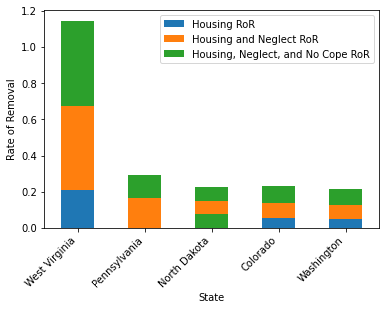

In [ ]:
# plot stacked bar chart
ax = merged_df.plot(kind='bar', stacked=True)
ax.set_ylabel('Rate of Removal')
ax.set_xlabel('State')
ax.set_xticklabels(['West Virginia', 'Pennsylvania', 'North Dakota', 'Colorado', 'Washington'], rotation=45, ha='right')


# change colors
ax.patches[0].set_facecolor('#002C7A')
ax.patches[1].set_facecolor('#2F7AFF')
ax.patches[2].set_facecolor('#BAD3FF')

# set legend labels
ax.legend(labels=['Housing RoR', 'Housing and Neglect RoR', 'Housing, Neglect, and No Cope RoR'])


plt.show()